[0.72655986 0.22844526 0.04043061 0.00456427]
[ 72.66  95.5   99.54 100.  ]
The accuracy of the classifier using the full feature set is 93.33 percent
The accuracy of the classifier using 2 principal components is 83.33 percent
The accuracy of the classifier using 3 principal components is 93.33 percent


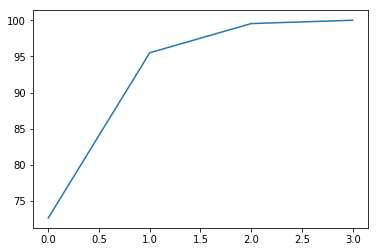

In [1]:
#This tutorial demonstrates how the Principal Components Analysis technique can be applied using Scikit-Learn library
#We use the iris flower dataset available for download at: https://archive.ics.uci.edu/ml/datasets/iris
 
#Loading the relevant libraries
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
%matplotlib inline
 
#Loading the dataset and naming columns
cols     = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Label']  
dataset  = pd.read_csv('iris.csv', skiprows = 1, names=cols) 

#Dividing data into dependent and target variables
#PCA only works on the dependent variables aka features
X = dataset.drop('Label', 1)  
y = dataset['Label'] 
 
#Splitting the data into train and test sets
#We will model the classifier on the training set then evaluate its performance on the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
 
#Normalizing the data to standardize the units
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 
 
#We apply PCA analysis on the normalized data
#Here we return all the principal components
pca = PCA()  
X1_train = pca.fit_transform(X_train)  
X1_test = pca.transform(X_test)
 
#We can look at the variance explained by each of the principal components
exp_var = pca.explained_variance_ratio_
 
#By printing out the explained variance for each component we can see weight of each factor
print (exp_var)
 
#We can also look at the Cumulative Variance across the principal components
cum_var=np.cumsum(np.round(exp_var, decimals=4)*100)
 
#Printing out cumulative variance to better select principal components
print (cum_var)
 
#Plotting out cumulative variance to visually determine the cut-off point
plt.plot(cum_var)
 
#Using the above we decide to test between 2 cut-off points
 
#Using 2 Principal Components
pca2 = PCA(n_components=2)
X2_train = pca2.fit_transform(X_train)
X2_test = pca2.transform(X_test)
 
#Using 3 Principal Components
pca3 = PCA(n_components=3)
X3_train = pca3.fit_transform(X_train)
X3_test = pca3.transform(X_test)
 
#Now we investigate the difference between using all the features in a dataset vs a subset through principal components
#For that we use a logistic regression to perform classification and evaluate the accuracy of using the different datasets
 
#Using the full feature set in a logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('The accuracy of the classifier using the full feature set is {:.2f} percent'.format(logreg.score(X_test, y_test)*100))
 
#Using 2 principal components in a logistic regression
logreg = LogisticRegression()
logreg.fit(X2_train, y_train)
print('The accuracy of the classifier using 2 principal components is {:.2f} percent'.format(logreg.score(X2_test, y_test)*100))
 
#Using 3 principal components in a logistic regression
logreg = LogisticRegression()
logreg.fit(X3_train, y_train)
print('The accuracy of the classifier using 3 principal components is {:.2f} percent'.format(logreg.score(X3_test, y_test)*100))